<a href="https://colab.research.google.com/github/idrice-junior/business-card/blob/main/NEURAL%20NET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def relu(z):
  return np.maximum(0,z)
def linear(z):
  return z
def derilinear(z):
  return 1
def derirelu(z):
  return relu(z)>0

In [4]:
def initialise(input_neurons,hidden_neurons,output_neurons):
  w1 = np.random.rand(hidden_neurons,input_neurons)-0.5
  b1 = np.zeros((hidden_neurons,1))
  w2 = np.random.rand(output_neurons,hidden_neurons)-0.5
  b2 = np.zeros((output_neurons,1))
  return w1,b1,w2,b2

In [5]:
#forward pass
def forwardpro(a0,w1,b1,w2,b2,):
  z1 = np.dot(w1,a0) + b1
  a1 = relu(z1)
  z2 = np.dot(w2,a1) + b2
  a2 = linear(z2)
  return z1,a1,z2,a2
a0 = np.array([0.5,0.5]).reshape(2,1)
w1,b1,w2,b2 = initialise(2,3,2)
z1,a1,z2,a2 = forwardpro(a0,w1,b1,w2,b2)


In [6]:
#compute gradients
def gradient(a2,y,z2,a1,w2,z1,a0):
  de2 = (a2-y)*derilinear(z2)
  db2 = de2
  dw2 = np.dot(de2,a1.T)
  da1 = np.dot(w2.T,de2)
  de1 = da1*derirelu(z1)
  db1 = de1
  dw1 = np.dot(de1,a0.T)
  return dw1,db1,dw2,db2
a0 = np.array([0.5,0.5]).reshape(2,1)
y = np.random.rand(2,1)
w1,b1,w2,b2 = initialise(2,3,2)
z1,a1,z2,a2 = forwardpro(a0,w1,b1,w2,b2)
dw1,db1,dw2,db2 = gradient(a2,y,z2,a1,w2,z1,a0)

In [7]:
# weight updates
def update(eta,w1,b1,w2,b2,dw1,db1,dw2,db2):
  w1 = w1 - eta*dw1
  b1 = b1 - eta*db1
  w2 = w2 - eta*dw2
  b2 = b2 - eta*db2
  return w1,b1,w2,b2

In [8]:
a0 = np.array([0.5,0.5]).reshape(2,1)
y = np.array([-0.5,0.5]).reshape(2,1)
eta = 0.1
epoch = 10
w1,b1,w2,b2 = initialise(2,3,2)
for i in range(epoch):
  z1,a1,z2,a2 = forwardpro(a0,w1,b1,w2,b2)
  dw1,db1,dw2,db2 = gradient(a2,y,z2,a1,w2,z1,a0)
  w1,b1,w2,b2 = update(eta,w1,b1,w2,b2,dw1,db1,dw2,db2)
  cost = (np.sum((a2-y)**2))*0.5

In [28]:
x_input = np.random.uniform(-1,1,(1000,2))
rm = [[-1,0],[0,1]]
x_ground = np.dot(rm,x_input.T).T


In [29]:
#plt.scatter(x_input[:,0],x_input[:,1], c ="RED")
#plt.scatter(x_ground[:,0],x_ground[:,1], c ="GREEN")
#plt.show()

In [33]:
a0 = np.array([0.5,0.5]).reshape(2,1)
y = np.array([-0.5,0.5]).reshape(2,1)
eta = 0.1
epoch = 200
w1,b1,w2,b2 = initialise(2,3,2)
for i in range(epoch):
  cost = 0
  for j in range(1000):
    a0 = x_input[j,:].T.reshape(2,1)
    y = x_ground[j,:].T.reshape(2,1)
    z1,a1,z2,a2 = forwardpro(a0,w1,b1,w2,b2)
    dw1,db1,dw2,db2 = gradient(a2,y,z2,a1,w2,z1,a0)
    w1,b1,w2,b2 = update(eta,w1,b1,w2,b2,dw1,db1,dw2,db2)
    cost = cost + (np.sum((a2-y)**2))*0.5
  print(cost)

30.37277297709309
0.13268472793831254
0.035382187865327666
0.014442145563338062
0.007193980667948437
0.004022439015727993
0.002430458886806609
0.0015577367121492676
0.0010144595533197087
0.0006865799433808827
0.0004894819667283837
0.0003648028769714193
0.00027275219986948735
0.00020469874716412003
0.00015452468459918364
0.00011722330182480741
8.908706696700227e-05
6.783871620056936e-05
5.1784288766677126e-05
3.96528789726877e-05
3.0486681966816313e-05
2.3562150398898006e-05
1.832731618180903e-05
1.4335862484278698e-05
1.126968961842434e-05
8.912422282769662e-06
7.099033678646638e-06
5.703283892293464e-06
4.628423770805377e-06
3.7939284279917105e-06
3.14352203405062e-06
2.6374467183239433e-06
2.191125961051587e-06
1.7515285287217568e-06
1.4078905038252139e-06
1.1389498875097976e-06
9.282089752857127e-07
7.628578771540902e-07
6.329427348070849e-07
5.307227805926827e-07
4.495811183045515e-07
3.8232493439621766e-07
3.2599719234001825e-07
2.7866881787681266e-07
2.387684013557839e-07
2.05023

In [47]:
test_x = np.arange(0,1,0.01)
test_y = test_x**2

test = np.column_stack([test_x,test_y])


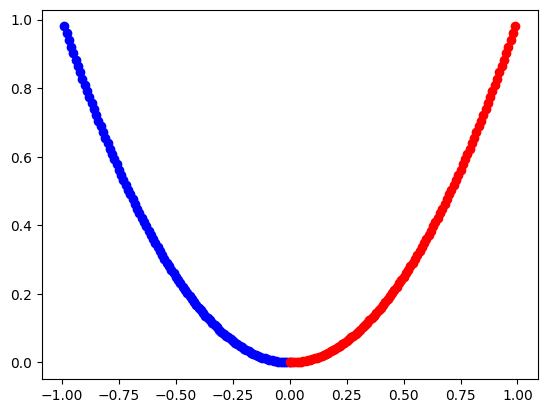

In [53]:
n = test.shape[0]
o = []
p = []
for i in range(0,n):
  a0 = test[i,:].T.reshape(2,1)
  z1,a1,z2,a2 = forwardpro(a0,w1,b1,w2,b2)
  o.append(a2[0,0])
  p.append(a2[1,0])
plt.scatter(o,p,c="blue")
plt.scatter(test[:,0], test[:,1], c="RED")
plt.show()
